# Principal Component Analysis

PCA란 데이터 간의 차이를 가장 잘 나타내는 요소를 찾는 방법이다.\
주성분 찾기, 데이터 압축(차원 감소), 노이즈 제거 등 다양한 분야로 사용한다.\
PCA는 데이터의 분산을 최대한 보존하면서 서로 직교하는 새 기저를 찾아 \
고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법이다.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

/tmp/ipykernel_32575/977772597.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
iris = load_iris()
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


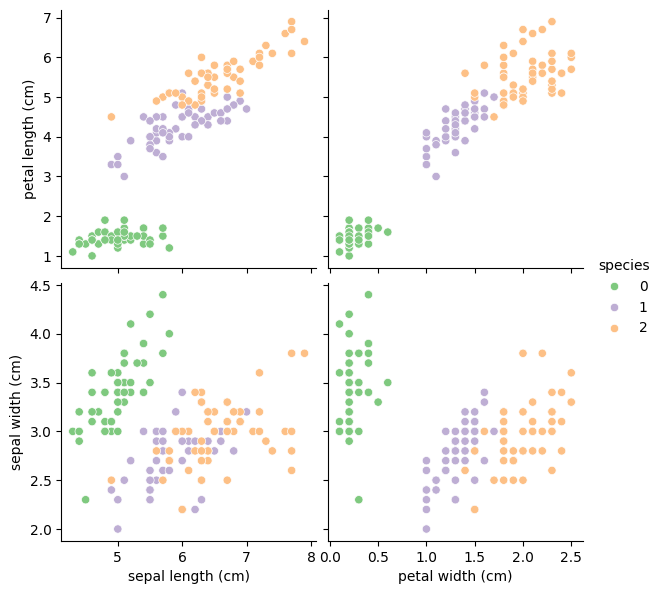

In [4]:
sns.pairplot(iris_pd, hue='species', height=3, x_vars=['sepal length (cm)', 'petal width (cm)'], y_vars=['petal length (cm)', 'sepal width (cm)'], palette='Accent')

In [5]:
iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [6]:
def get_pca_data(ss_data, n_components=2) :
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    return pca.transform(ss_data), pca

In [7]:
iris_pca, pca = get_pca_data(iris_ss, n_components=2)
iris_pca.shape

(150, 2)

In [8]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [9]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [10]:
def get_pd_from_pca(pca_data, cols=['pca_component_1', 'pca_component_2']) :
    return pd.DataFrame(pca_data, columns=cols)

In [27]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head(3)

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


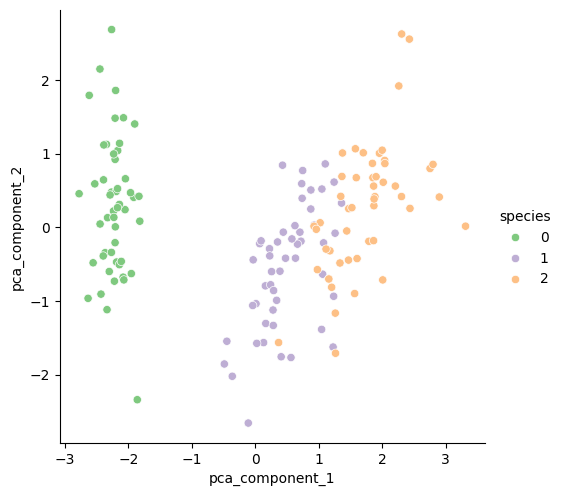

In [28]:
# 네 개의 특성을 두 개로 정리했다.
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['pca_component_1'], y_vars= ['pca_component_2'], palette='Accent')

In [13]:
# 두 개의 축으로 줄여도 전체의 95.8%를 표현할 수 있다.

def print_variance_ratio(pca) :
    print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of variance_ratio : ', np.sum(pca.explained_variance_ratio_))

print_variance_ratio(pca)

variance_ratio :  [0.72962445 0.22850762]
sum of variance_ratio :  0.9581320720000165


In [14]:
def rf_scores(x, y, cv=5) :
    rf = RandomForestClassifier(random_state=5, n_estimators=100)
    scores_rf = cross_val_score(rf, x, y, scoring='accuracy', cv=cv)

    print('Score : ', np.mean(scores_rf))

rf_scores(iris_ss, iris.target)

Score :  0.96


In [15]:
pca_x = iris_pd_pca[['pca_component_1', 'pca_component_2']]
rf_scores(pca_x, iris.target)

Score :  0.8933333333333333


# wine

In [29]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')
red_wine['color']=1.
white_wine['color']=0.
wine = pd.concat([red_wine, white_wine])
wine_y = wine['color']
wine_x = wine.drop(['color'], axis=1)
wine_ss = StandardScaler().fit_transform(wine_x)

In [30]:
# 주성분을 두 개로 줄이면 전체 데이터의 50%가 안된다.
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117]
sum of variance_ratio :  0.47428342743236135


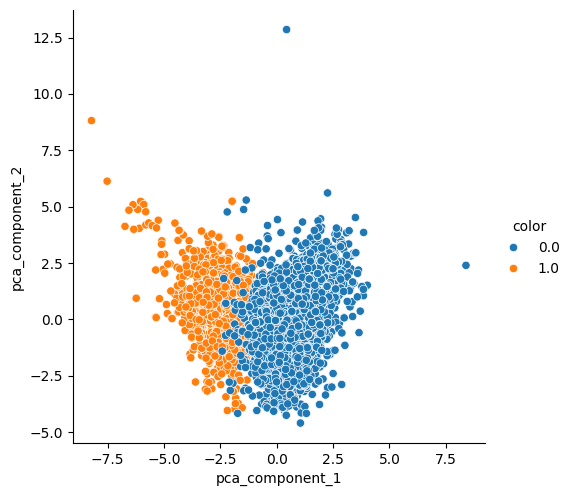

In [19]:
pca_columns = ['pca_component_1', 'pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values
sns.pairplot(pca_wine_pd, hue='color', height=5, x_vars=['pca_component_1'], y_vars=['pca_component_2']);

In [20]:
rf_scores(wine_ss, wine_y)

Score :  0.9933815360928525


In [21]:
pca_x = pca_wine_pd[['pca_component_1', 'pca_component_2']]
rf_scores(pca_x, wine_y)

Score :  0.981837508142358


In [22]:
# 주 성분을 세 개로 표현하면 98% 이상을 표현할 수 있다.
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)
cols = ['pca_1', 'pca_2', 'pca_3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)
pca_x = pca_wine_pd[cols]
rf_scores(pca_x, wine_y)

variance_ratio :  [0.25346226 0.22082117 0.13679223]
sum of variance_ratio :  0.6110756621838699
Score :  0.9832236631728548


In [23]:
pca_wine_plot = pca_x
pca_wine_plot['color'] = wine_y.values
pca_wine_plot.head()

,pca_1,pca_2,pca_3,color
0,-3.348438,0.568926,-2.727386,1.0
1,-3.228595,1.197335,-1.998904,1.0
2,-3.237468,0.952580,-1.746578,1.0
3,-1.672561,1.600583,2.856552,1.0
4,-3.348438,0.568926,-2.727386,1.0


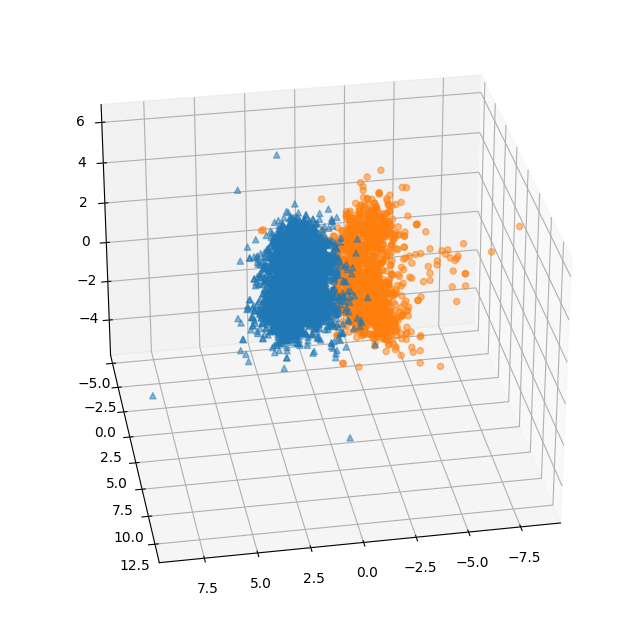

In [24]:
from mpl_toolkits.mplot3d import Axes3D

markers = ['^', 'o']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers) :
    x_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_1']
    y_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_2']
    z_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_3']

    ax.scatter(x_axis_data, y_axis_data, z_axis_data, s=20, alpha=0.5, marker=marker)

ax.view_init(30, 80)
plt.show()

In [25]:
import plotly.express as px

fig = px.scatter_3d(pca_wine_plot, x='pca_1', y='pca_2', z='pca_3', color='color', symbol='color', opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()